# Ocean eddy tracking SATELLITE

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from calendar import monthrange

In [2]:
year='1995'
monthsin=1
monthsend=3

In [3]:
print('Analizing the year ',year,'in the months[',monthsin,'-',monthsend,']')
inputfiles='/g/data/ua8/CMEMS_SeaLevel/v3-0/'+year+'/'

outfile='/g/data/v45/jm5970/trackeddy_out/'

ii=0

datashapetime=0
for month in range(monthsin,monthsend):
    datashapetime=datashapetime+monthrange(int(year), month)[1]

ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_'+year+'0101_20170110.nc')
ssha=squeeze(ncfile.variables['sla'][:])
lon=ncfile.variables['longitude'][:]
lat=ncfile.variables['latitude'][:]

sshatime=zeros([datashapetime,shape(ssha)[0],shape(ssha)[1]])
ii=0
print('Start loading data')
for month in range(monthsin,monthsend):
    daysmonth=monthrange(int(year), month)[1]
    for days in range(1,daysmonth+1):
        ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_'+year+'%02d'%month+'%02d'%days+'_20170110.nc')
        sshatime[ii,:,:]=squeeze(ncfile.variables['sla'][:])        
        ii=ii+1
ssha=ma.masked_where(sshatime <= -2147483647, sshatime)
del sshatime
print('End loading data')

Analizing the year  1995 in the months[ 1 - 3 ]
Start loading data
End loading data


In [4]:
#areamap=array([[0,len(lon)],[0,len(lat)]])
areamap=array([[0,len(lon)],[0,int(len(lat)/3)]])

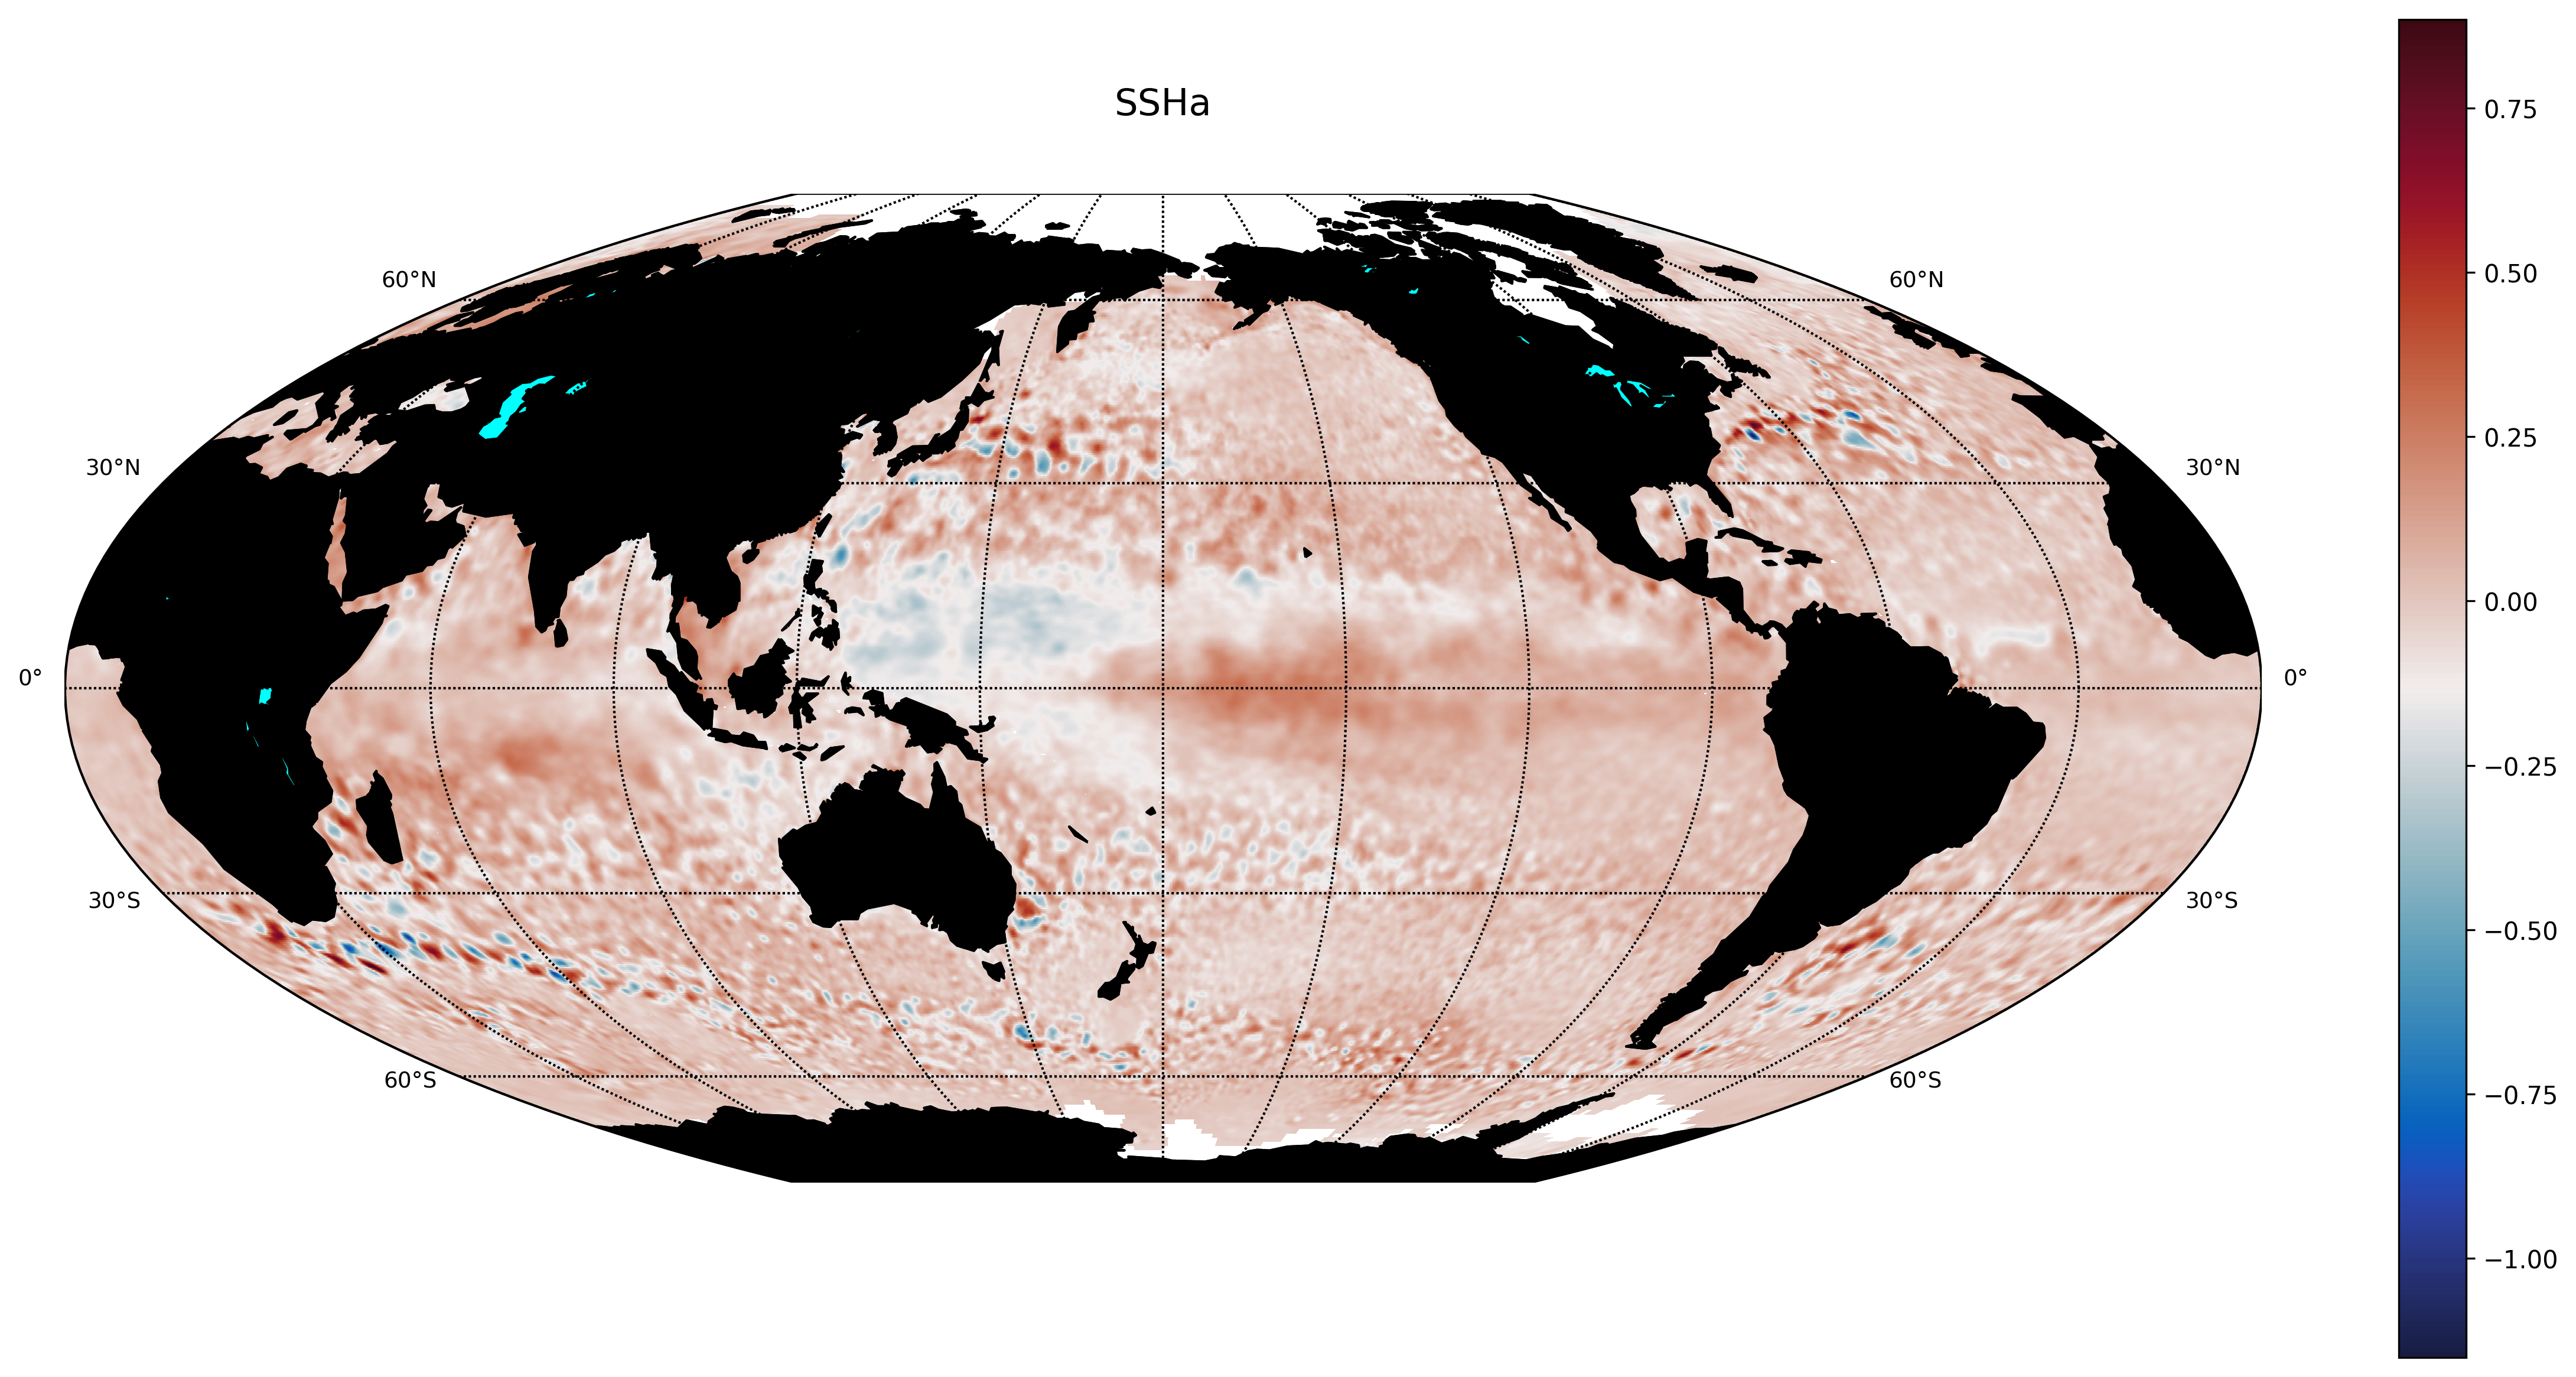

In [5]:
basemap_mplot(lon,lat,ssha[0,:,:],title="SSHa",projection='mbtfpq',lat_0=-90,lon_0=-180,\
              resolution='c',scale='Lin',vmin=-0.8,vmax=0.8,cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(20,10),fontsize=15)
colorbar()

(<matplotlib.figure.Figure at 0x7f37d2edee10>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d2dd1198>,
       dtype=object))

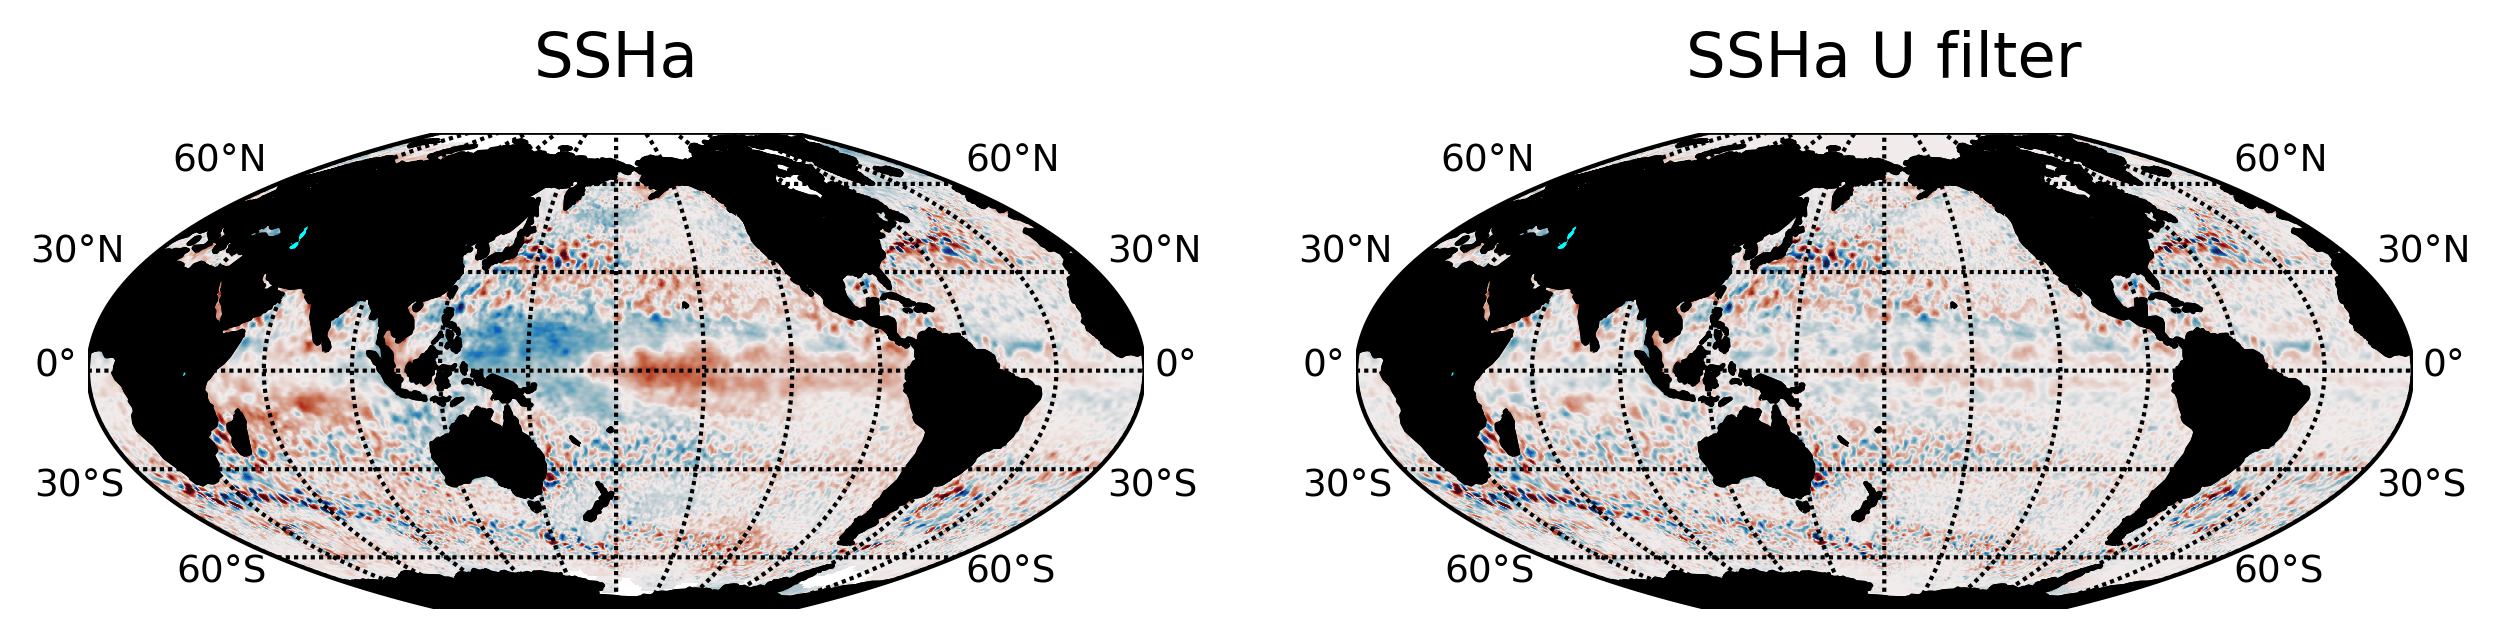

In [6]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
nofilterdata = ssha[0,:,:]
nofilterdata = nofilterdata.filled(fill_value=0)
nofilterdata = nofilterdata - ndimage.uniform_filter(nofilterdata, size=50)
#data = ma.masked_array(nofilterdata, mask)
basemap_mplot(lon,lat,[ssha[0,:,:],nofilterdata],title=["SSHa","SSHa U filter"]\
              ,projection='mbtfpq',lat_0=-90,lon_0=-180,scale='Lin',cmap=cm.cm.balance\
              ,vmin=-0.5,vmax=0.5,xan=2,yan=1,figsize=(10,5),fontsize=15,dpi=300)

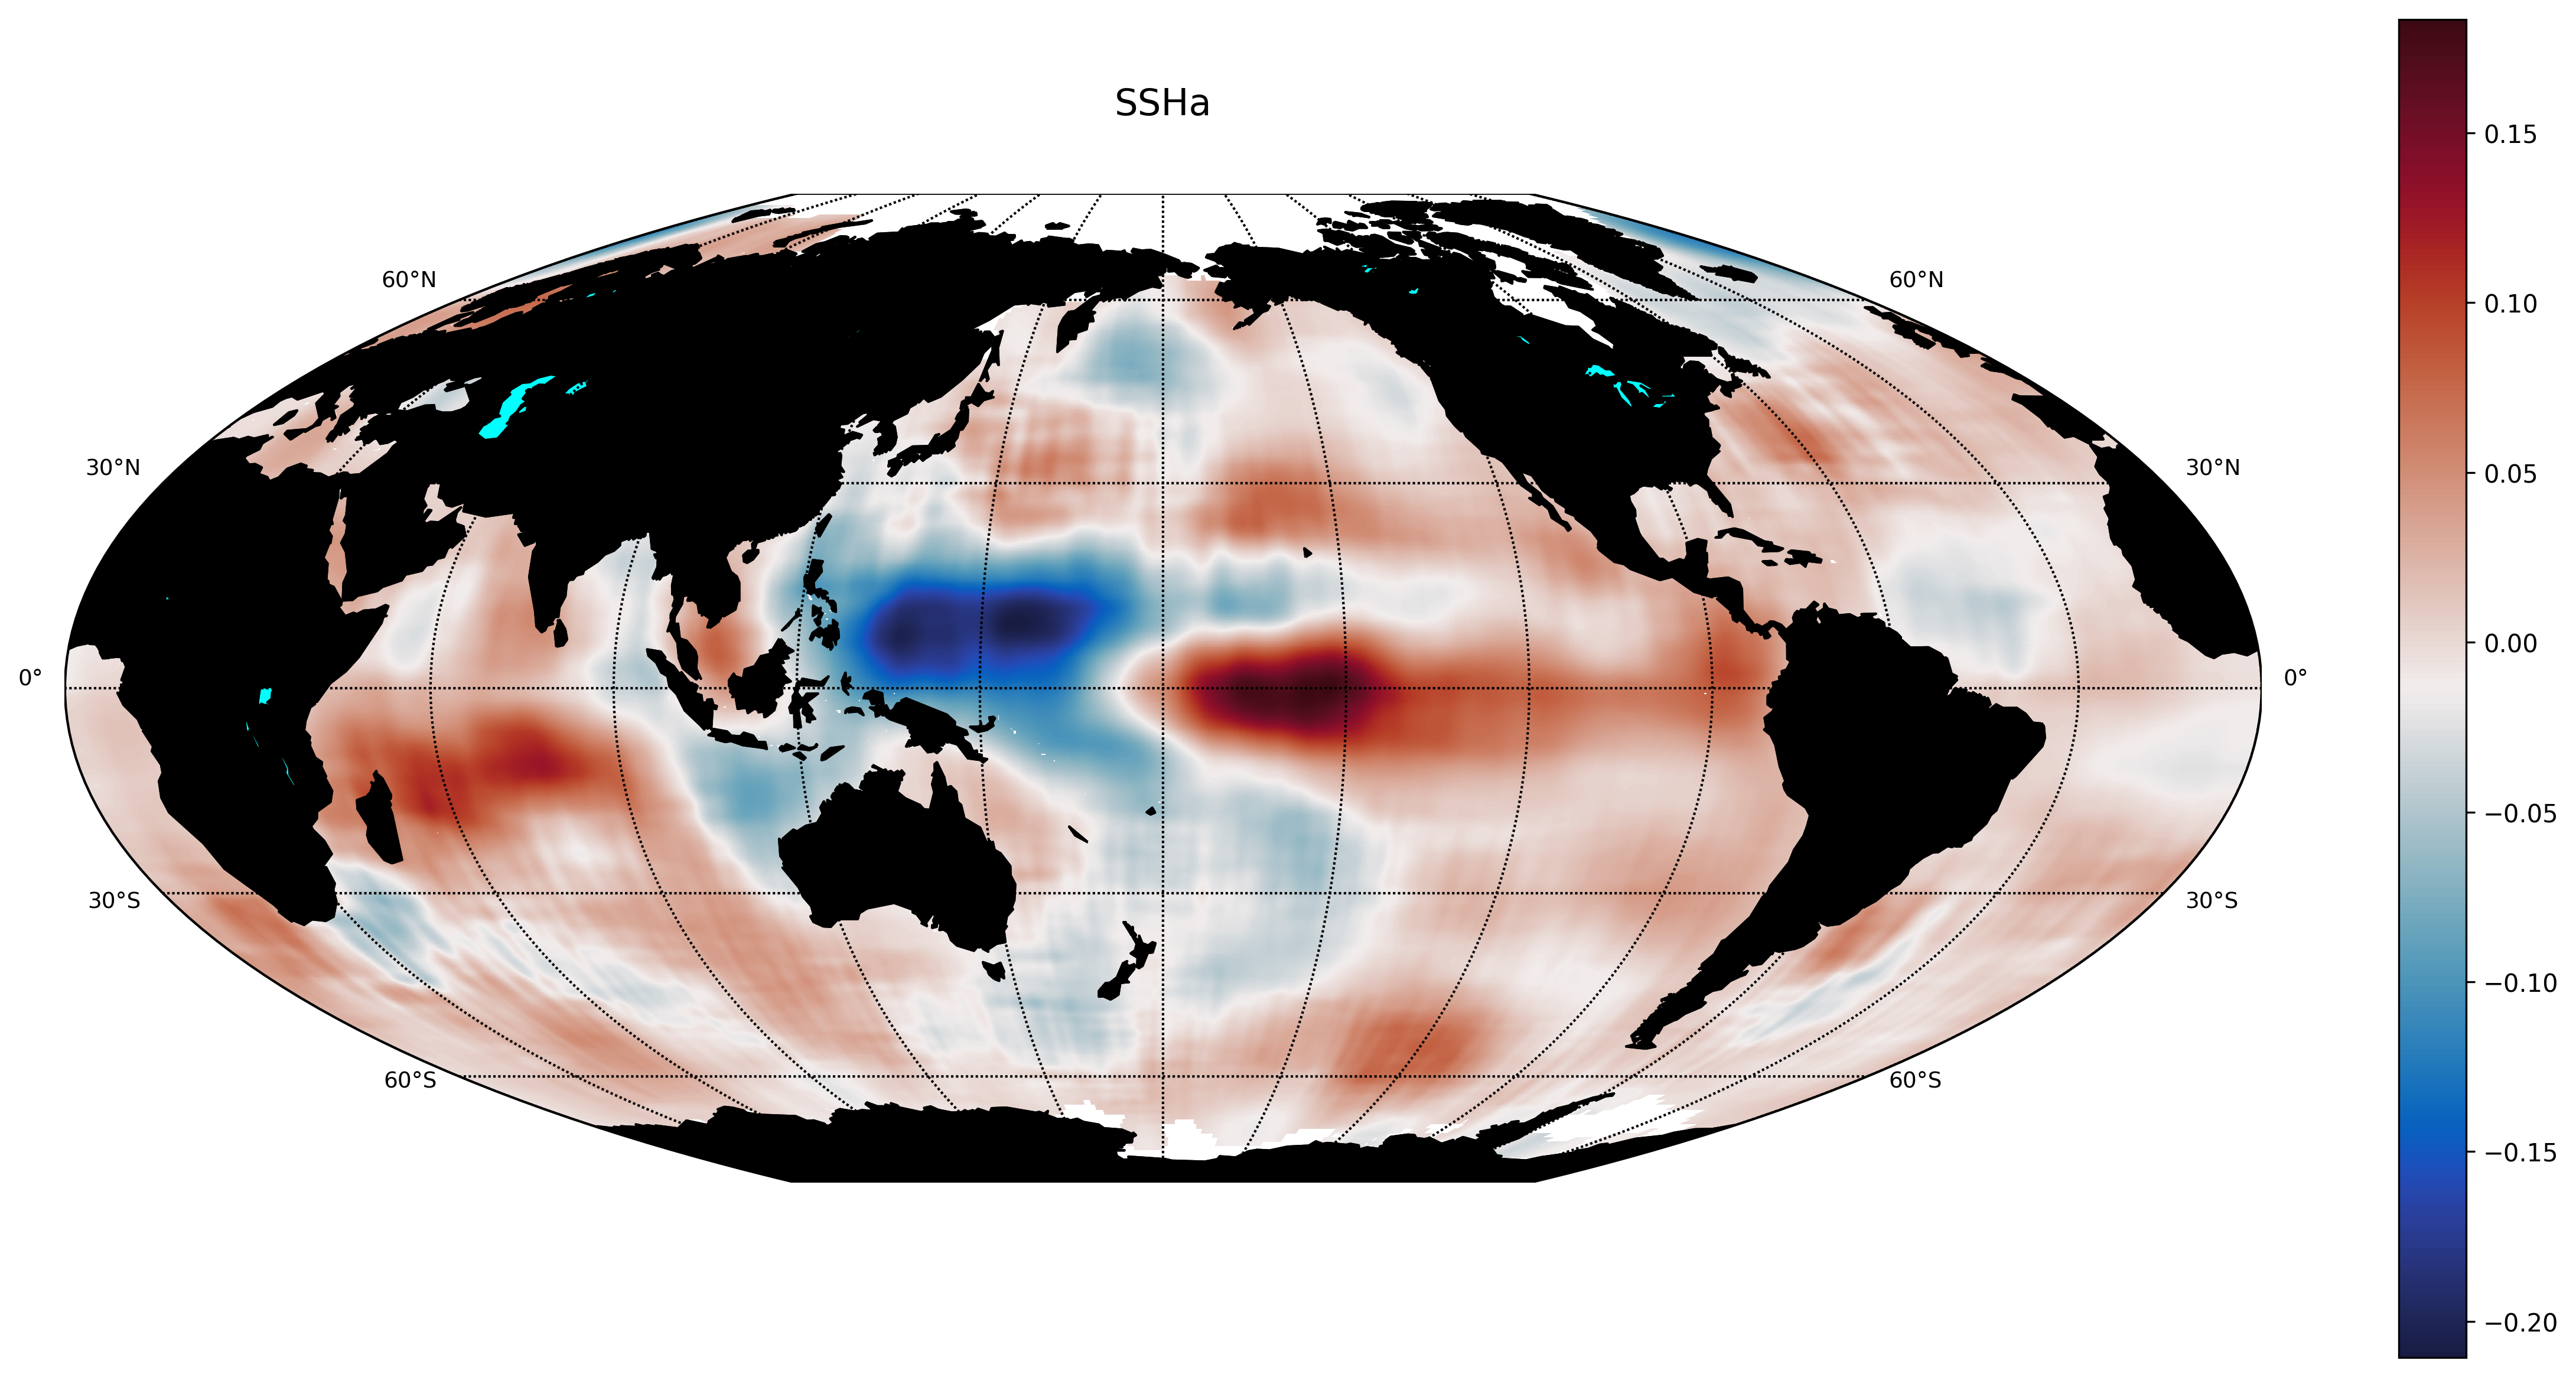

In [7]:
basemap_mplot(lon,lat,ssha[0,:,:]-nofilterdata,title="SSHa",projection='mbtfpq',lat_0=-90,lon_0=-180,\
              resolution='c',scale='Lin',vmin='',vmax='',cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(20,10),fontsize=15)
colorbar()

In [8]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
#areamap=array([[0,int(len(lon)/10)],[0,int(len(lat)/3)]])
#areamap=array([[0,len(lon)],[0,int(len(lat)/3)]])
#areamap=array([[int(len(lon)/1.5),len(lon)-int(len(lon)/4)],[int(len(lat)/2),int(len(lat))]])
areamap=array([[0,len(lon)],[0,len(lat)]])
#areamap=array([[0,len(lon)],[int(len(lat)/3),int(len(lat)-len(lat)/3)]])
#areamap=array([[650,800],[200,400]])

In [9]:
areamap

array([[   0, 1440],
       [   0,  720]])

In [ ]:
eddytd=analyseddyzt(ssha[0:2,:,:],lon,lat,0,2,1,ssha[0:2,:,:].max(),0.01,0.01\
                    ,data_meant='',areamap=areamap,mask=''\
                    ,eccenfit=0.85,gaussrsquarefit=0.7,ellipsrsquarefit=0.7\
                    ,maskopt='contour',sfilter='uniform',sfsize=50\
                    ,destdir='',physics='',diagnostics=False,plotdata=False,pprint=False)

 0% [====================>]100% | Elapsed Time:0 s | Estimated Time:0 s | Info: Init time |


In [ ]:
eddysplot=reconstruct_syntetic(shape(ssha),lon,lat,eddytd,diagnostics=False)

In [ ]:
eddytdn=analyseddyzt(ssha[0:2,:,:],lon,lat,0,2,1,ssha[0:2,:,:].min(),-0.01,-0.01\
                     ,data_meant='',areamap=areamap,mask=''\
                     ,eccenfit=0.85,gaussrsquarefit=0.7,ellipsrsquarefit=0.7\
                     ,maskopt='contour',sfilter='uniform',sfsize=50\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
eddysplotn=reconstruct_syntetic(shape(ssha),lon,lat,eddytdn,diagnostics=False)

In [ ]:
key='eddyn_35'
eddytd[key]['ellipse'][0][0]-eddytd[key]['ellipse'][1][0]

In [ ]:
#pcolormesh(lon,lat,eddysplot[0,:,:])

Lon,Lat=meshgrid(lon,lat)

gausssianfitp=eddytd[key]['2dgaussianfit'][0]

gaussianfit=twoD_Gaussian((Lon,Lat,eddytd[key]['position_maxvalue'][0][2],\
                         eddytd[key]['position_maxvalue'][0][0],\
                         eddytd[key]['position_maxvalue'][0][1]),*gausssianfitp)

gaussarea= gaussareacheck((lon,lat,eddytd[key]['position_maxvalue'][0][2],\
                         eddytd[key]['position_maxvalue'][0][0],\
                         eddytd[key]['position_maxvalue'][0][1])\
                          ,eddytd[key]['level'][0],gausssianfitp,eddytd[key]['area'][0][2])
print(gaussarea)
print(eddytd[key]['area'])
print(gausssianfitp)

fit=gaussianfit.reshape(len(lat),len(lon))
pcolormesh(lon,lat,fit)

plot(eddytd[key]['ellipse'][0][0],eddytd[key]['ellipse'][0][1],'-r')
plot(eddytd[key]['contour'][0][0],eddytd[key]['contour'][0][1],'-k')
print(fit.max())

eccentricity(gausssianfitp[1],gausssianfitp[2])<0.85

In [ ]:
eddytd[key]['level']

In [ ]:
basemap_mplot(lon,lat,[ssha[0,:,:],ssha[0,:,:]-eddysplot[0,:,:]-eddysplotn[0,:,:],eddysplotn[0,:,:],eddysplot[0,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction","Positive Eddies extraction"]\
              ,projection='mbtfpq',lat_0=-90,lon_0=-180,scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.5,vmax=0.5,xan=2,yan=2,figsize=(20,10),fontsize=20);

In [ ]:
mask=ma.getmask(ssha[0,:,:])

In [ ]:
u_g,v_g=geovelfield(ssha[0,:,:],lon,lat,mask,5)
plt.pcolormesh(u_g,vmin=0)
print(nanmax(u_g),nanmax(v_g))

In [ ]:
eddyu,eddyv=geovelfield(eddysplotn[0,:,:]+eddysplot[0,:,:],lon,lat,mask)

In [ ]:
ke=KE(u_g,v_g)
eke=KE(eddyu,eddyv)
bjke=ke-eke#KE(u_g-eddyu,v_g-eddyv)

LO,LA=meshgrid(lon,lat)
newmask=np.ma.masked_where((LA <= -5) | (LA >= 5), LA)
newmask.mask

print(mean(ke*newmask.mask),mean(bjke*newmask.mask),mean(eke*newmask.mask))

In [ ]:
eu,ev=geovelfield(nofilterdata,lon,lat,mask)


In [ ]:
eeke=KE(eu,ev)
mean(eeke)


In [ ]:
print(mean(ke*newmask.mask),mean(bjke*newmask.mask),mean(eke*newmask.mask))

In [ ]:
basemap_mplot(lon,lat,[ke,bjke,eke]\
              ,title=["TKE","B&J KE","EKE"],scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-180,vmin=0,vmax=10,xan=3,yan=1,figsize=(20,30),fontsize=20);

In [ ]:
basemap_mplot(lon,lat,ke*newmask.mask\
              ,title="TKE",scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-180,vmin=0,vmax=10,xan=1,yan=1,figsize=(20,10),fontsize=20);
colorbar()

In [ ]:
basemap_mplot(lon,lat,eke*newmask.mask\
              ,title="EKE",scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-180,vmin=0,vmax=10,xan=1,yan=1,figsize=(20,10),fontsize=20);
colorbar()

In [ ]:
basemap_mplot(lon,lat,ke*newmask.mask-eke*newmask.mask\
              ,title="BKE",scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-180,vmin=0,vmax=10,xan=1,yan=1,figsize=(20,10),fontsize=20);
colorbar()

In [ ]:
u_g=zeros(shape(ssha))
v_g=zeros(shape(ssha))
for ii in range(30):
    u_g[ii,:,:],v_g[ii,:,:]=geovelfield(ssha[ii,:,:],lon,lat,mask)

In [ ]:
threshold=3
eddysup=exeddydt(eddytd,lat,lon,u_g,threshold,inside=ssha[:,:,:],diagnostics=False)
eddysun=exeddydt(eddytdn,lat,lon,u_g,threshold,inside=ssha[:,:,:],diagnostics=False)

In [ ]:
threshold=3
eddysvp=exeddydt(eddytd,lat,lon,v_g,threshold,inside=ssha[:,:,:],diagnostics=False)
eddysvn=exeddydt(eddytdn,lat,lon,v_g,threshold,inside=ssha[:,:,:],diagnostics=False)

In [ ]:
eddyu=(eddysun+eddysup)
eddyv=(eddysvn+eddysvp)

In [ ]:
###Creating animation of KE
eke =zeros(shape(eddyu))
print(shape(eke))
for ii in range(30):
    eke[ii,:,:]=KE(eddyu[ii,:,:],eddyv[ii,:,:])
    bjke=KE(u_g[ii,:,:]-eddyu[ii,:,:],v_g[ii,:,:]-eddyv[ii,:,:])
    ke=KE(u_g[ii,:,:],v_g[ii,:,:])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(15, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)
#############################
#Plot the background and other things, This will be in all the frames
map = Basemap(projection='mbtfpq',lat_0=-90,lon_0=-180,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,eke[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2)
cb1 = fig.colorbar(quad1,ax=ax1)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    return quad1
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eke[iter,:,:].ravel())
    return quad1
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=30,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2



In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
##############################
#Save animation
anim2.save('../output/eke_30days_ecc0-08_1axis.mp4', writer=writer)

In [ ]:
import xarray as xr
ncfile=xr.open_dataset('/home/156/jm5970/github/trackeddy/data.input/meanssh_10yrs_AEXP.nc',decode_times=False)

In [ ]:
ncfile.SSH_mean.plot()

In [ ]:
sqrt(1-1/4)

In [ ]:
day1=xr.open_dataset('/g/data/ua8/CMEMS_SeaLevel/v3-0/1993/dt_global_allsat_phy_l4_19930101_20170110.nc',decode_times=False)
day2=xr.open_dataset('/g/data/ua8/CMEMS_SeaLevel/v3-0/1993/dt_global_allsat_phy_l4_19930102_20170110.nc',decode_times=False)

In [ ]:
sla1=squeeze(day1.sla.load())
sla2=squeeze(day2.sla.load())

In [ ]:
plt.pcolormesh(sla1-sla2)

## 